### Taylor Series

Best viewed on notebook viewer
https://nbviewer.jupyter.org/github/coderofgames/Python-Math/blob/master/Vectors/Taylor_Series.ipynb

The Taylor series of a function about a point $a$ is 
   
$$ f(x) = f(a) +  f'(a)(x-a) + \frac{1}{2!} f''(a)(x-a)^2 + \frac{1}{3!} f'''(a)(x-a)^3 +\cdots + \frac{1}{n!}f^n(a)(x-a)^n $$
   
The end is often abreviated to $O(x^4)$ to mean plus terms in the order of $x^4$. The series can also be written
   
$$ f(x) = f(a) +  h f'(a) + \frac{h^2}{2!} f''(a) + \frac{h^3}{3!} f'''(a) +\cdots + \frac{h^m}{n!}f^n(a) $$
   
where $h = \delta x = x-a$. The series can also be written as a sum
   
$$ f(x) = \sum_{n=0}^\infty \frac{h^n }{n!} \frac{d^n f(a)}{dx^n} $$

In [30]:
# stack overflow link
# https://stackoverflow.com/questions/16869587/how-to-do-a-symbolic-taylor-expansion-of-an-unknown-function-fx-using-sympy
from sympy import init_printing, symbols, Function
init_printing()

x, a = symbols("x,a")
h = symbols("h")
f = Function("f")

f(x).series(x, x0=a, n=4)

                                              ⎛  2        ⎞│                 ⎛
                                            2 ⎜ d         ⎟│               3 ⎜
                                    (-a + x) ⋅⎜────(f(ξ₁))⎟│       (-a + x) ⋅⎜
                                              ⎜   2       ⎟│                 ⎜
                ⎛ d        ⎞│                 ⎝dξ₁        ⎠│ξ₁=a             ⎝
f(a) + (-a + x)⋅⎜───(f(ξ₁))⎟│     + ──────────────────────────── + ───────────
                ⎝dξ₁       ⎠│ξ₁=a                2                            

  3        ⎞│                          
 d         ⎟│                          
────(f(ξ₁))⎟│                          
   3       ⎟│                          
dξ₁        ⎠│ξ₁=a    ⎛        4       ⎞
───────────────── + O⎝(-a + x) ; x → a⎠
  6                                    

In [31]:
f(x).series(x, x0=a, n=4).subs({(x):h+a})

                                ⎛  2        ⎞│          ⎛  3        ⎞│        
                              2 ⎜ d         ⎟│        3 ⎜ d         ⎟│        
                             h ⋅⎜────(f(ξ₁))⎟│       h ⋅⎜────(f(ξ₁))⎟│        
                                ⎜   2       ⎟│          ⎜   3       ⎟│        
         ⎛ d        ⎞│          ⎝dξ₁        ⎠│ξ₁=a      ⎝dξ₁        ⎠│ξ₁=a    
f(a) + h⋅⎜───(f(ξ₁))⎟│     + ───────────────────── + ───────────────────── + O
         ⎝dξ₁       ⎠│ξ₁=a             2                       6              

    
    
    
    
⎛ 4⎞
⎝h ⎠
    

from wikipedia, the generalized Taylor series to functions of more than one variable is
   
$$ T(x_1,\cdots,x_d) = \sum_{n_1=0}^\infty \cdots \sum_{n_d=0}^\infty \frac{(x_1 - a_1)^{n_1}\cdots (x_d - a_d)^{n_d}}{n_1 ! \cdots n_d !}\left(\frac{\partial^{n_1+\cdots +n_d} T}{\partial x_1^{n_1}\cdots \partial x_d^{n_s}}\right) (a_1,\cdots, a_d)$$
   
denoting the expansion about the point $(a_1,\cdots, a_d)$ where $d$ is the dimension of the multi-index.

In [33]:
y, b = symbols("y, b")


In [43]:
# stack overflow link 
# https://stackoverflow.com/questions/22857162/multivariate-taylor-approximation-in-sympy
# multi variable taylor series
from sympy import *

(f(x,y).series(x,x0=a,n=3).removeO().series(y,x0=b,n=3).removeO())

                                                    ⎛    ⎛          ⎛  2      
                                                    ⎜    ⎜        2 ⎜ ∂       
                                                    ⎜    ⎜(-b + y) ⋅⎜────(f(ξ₁
   ⎛  2                                 ⎞│          ⎜  2 ⎜          ⎜   2     
 2 ⎜ ∂  ⎛         ⎛ ∂            ⎞│    ⎞⎟│        2 ⎜ ∂  ⎜          ⎝∂ξ₂      
a ⋅⎜────⎜(-b + y)⋅⎜───(f(ξ₁, ξ₂))⎟│    ⎟⎟│       a ⋅⎜────⎜────────────────────
   ⎜   2⎝         ⎝∂ξ₂           ⎠│ξ₂=b⎠⎟│          ⎜   2⎝               2    
   ⎝∂ξ₁                                 ⎠│ξ₁=a      ⎝∂ξ₁                      
────────────────────────────────────────────── + ─────────────────────────────
                      2                                                 2     
                                                                              

      ⎞│    ⎞⎞│                                                               
      ⎟│    ⎟⎟│                                    

In [44]:
xi_1,xi_2 = symbols("xi_1, xi_2")
xi_1

In [50]:
# stack overflow link
# https://stackoverflow.com/questions/18708155/multivariate-series-expansion-in-sympy
# using a temporary variable "eps"
import sympy
x, y , eps = sympy.symbols('x y eps')
#f = sympy.exp(x-y)
f(x,y).subs(x,x*eps).subs(y,y*eps).series(eps).removeO().subs(eps,1)

   ⎛  5           ⎞│            ⎛⎛    5              ⎞│    ⎞│          ⎛  4   
 5 ⎜ d            ⎟│        4   ⎜⎜   ∂               ⎟│    ⎟│        4 ⎜ d    
x ⋅⎜────(f(ξ₁, 0))⎟│       x ⋅y⋅⎜⎜────────(f(ξ₁, ξ₂))⎟│    ⎟│       x ⋅⎜────(f
   ⎜   5          ⎟│            ⎜⎜       4           ⎟│    ⎟│          ⎜   4  
   ⎝dξ₁           ⎠│ξ₁=0        ⎝⎝∂ξ₂ ∂ξ₁            ⎠│ξ₁=0⎠│ξ₂=0      ⎝dξ₁   
──────────────────────── + ────────────────────────────────────── + ──────────
          120                                24                               

        ⎞│             ⎛⎛    5              ⎞│    ⎞│            ⎛⎛    4       
        ⎟│        3  2 ⎜⎜   ∂               ⎟│    ⎟│        3   ⎜⎜   ∂        
(ξ₁, 0))⎟│       x ⋅y ⋅⎜⎜────────(f(ξ₁, ξ₂))⎟│    ⎟│       x ⋅y⋅⎜⎜────────(f(ξ
        ⎟│             ⎜⎜       4           ⎟│    ⎟│            ⎜⎜       3    
        ⎠│ξ₁=0         ⎝⎝∂ξ₂ ∂ξ₁            ⎠│ξ₁=0⎠│ξ₂=0        ⎝⎝∂ξ₂ ∂ξ₁     
────────────── + ──────────────────────────────────

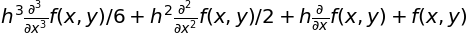

In [51]:
# can't find the link, however this was useful
sum(h**i/factorial(i) * f(x,y).diff(x, i) for i in range(4))

In [85]:
from sympy.abc import i, n
sum(sum((x-a)**i (y-b)**n/(factorial(i)*factorial(n)) * f(x,y).diff(x, i).diff(y,n),(i,1,4)),(n,1,4))

TypeError: 'Zero' object is not iterable

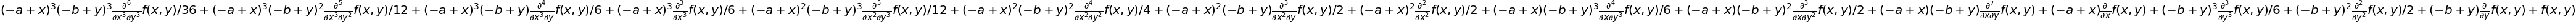

In [92]:
# original code
# http://firsttimeprogrammer.blogspot.co.uk/2015/03/taylor-series-with-python-and-sympy.html

# multivariable modification (myself)
def taylor(function,x0,y0, n):
    
    m=0
    p = 0
    while m <= n:
        i = 0
        while i <= n:
            p = p + (function.diff(x,i).diff(y,m))/(factorial(i)*factorial(m))*(x-x0)**i*(y-y0)**m
            i += 1
        m += 1
    return p

(taylor(f(x,y), a, b, 3))

In [95]:
# another from the first stack overflow link, just another way of replacing (x-x0) with h
FW = f(x+h).series(x+h, x0=a, n=3)
FW = FW.subs(x-a,0)
FW

                                ⎛  2        ⎞│                                
                              2 ⎜ d         ⎟│                                
                             h ⋅⎜────(f(ξ₁))⎟│                                
                                ⎜   2       ⎟│                                
         ⎛ d        ⎞│          ⎝dξ₁        ⎠│ξ₁=a    ⎛ 3    2        2    3  
f(a) + h⋅⎜───(f(ξ₁))⎟│     + ───────────────────── + O⎝h  + h ⋅x + h⋅x  + x ; 
         ⎝dξ₁       ⎠│ξ₁=a             2                                      

                
                
                
                
               ⎞
(h, x) → (0, 0)⎠
                

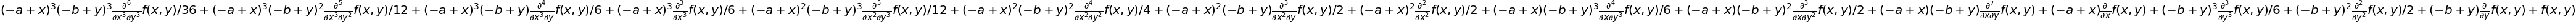

In [101]:
# expanding up the mathematics in the taylor function based on the series definition on
# wikipedia
def taylor2(function,x0,y0, n):
    
    m=0
    p = 0
    while m <= n:
        i = 0
        fd = function.diff(y,m)
        prod = (y-y0)**m
        facto = factorial(m)
        while i <= n:
            fm = fd.diff(x,i)
            prod2 = prod*(x-x0)**i
            facto2 = facto*factorial(i)            
            p = p + fm/facto2*prod2
            i += 1
        m += 1
    return p

(taylor2(f(x,y), a, b, 3))
    

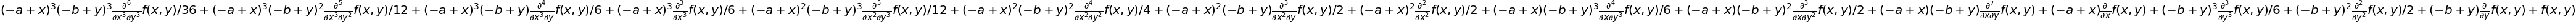

In [134]:
# recursive function (written by me) based on above code

# p: the sum
# fd: the function i.e. f(x,y,z)
# prod: the current product i.e (x-x0)^3 * (y-y0)^2
# the list X contains the coordinates, 
# the list X0 contains the point the series is expanded about i.e. X0=[a,b]
# the number n contains the current coordinate, i.e. n=0, then X[0] is x
# the number N contains the order of the expansion
# the number num_coords contains the number of coordinates
def taylor3_rec(p, fd, prod, facto, X, X0, n, N, num_coords):

    i = 0
    while i<= N:
        fm = fd.diff(X[n], i)
        prod2 = prod* (X[n]-X0[n])**i
        facto2 = facto * factorial(i)
        
        if n == num_coords-1:
            p = p + (fm/facto2)*prod2
        else:
            p=taylor3_rec(p, fm, prod2, facto2, X, X0, n+1, N, num_coords)
        i = i+1
    return p

X = [x,y]
X0 = [a,b]
n =0
N = 3
p = 0
fd = f(x,y)


taylor3_rec(p, f(x,y), 1, 1, X, X0, n, N,2)



In [135]:
# does the function work for 2 variables?
taylor3_rec(p, f(x,y), 1, 1, X, X0, n, N,2) == (taylor2(f(x,y), a, b, 3))

True

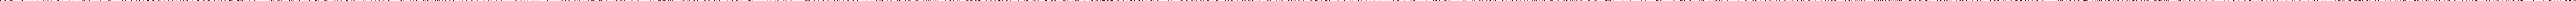

In [140]:
# just for fun, printing the function for 4 variables
x_1, x_2, x_3, x_4 = symbols("x_1, x_2, x_3, x_4")
c,d = symbols("c,d")
X = [x_1, x_2, x_3, x_4]
X0 = [a,b,c,d]

n =0
N = 3
p = 0
g = Function("g")



taylor3_rec(p, g(x_1,x_2,x_3,x_4), 1, 1, X, X0, n, N,4)